In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
path="incident_event_log.csv"

In [116]:
# Import the Dataset
dataset = pd.read_csv(path)

In [117]:
dataset.shape

(141712, 36)

In [118]:
dataset.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/02/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/02/2016 11:29,05/03/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/02/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/02/2016 11:29,05/03/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/02/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/02/2016 11:29,05/03/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/02/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/02/2016 11:29,05/03/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/02/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,01/03/2016 09:52,06/03/2016 10:00


In [119]:
dataset.info()
#Ok there are no null entry.
#but have many '?'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null obj

In [120]:
#set all '?' entry as null and reread
missing_values = ['?']
dataset = pd.read_csv(path, na_values = missing_values)
print(dataset.isnull().values.sum())

c:\users\jingr\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (19,31) have mixed types. Specify dtype option on import or set low_memory=False.



894597


In [121]:
info=dataset.info()
# the "cmdb_ci","problem_id","rfc","vendor","caused_by" columns don't have enough non-null values.  
# So, we delete these columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141683 non-null object
opened_by                  136877 non-null object
opened_at                  141712 non-null object
sys_created_by             88636 non-null object
sys_created_at             88636 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141636 non-null object
category                   141634 non-null object
subcategory                141601 non-null objec

In [122]:
dataset.drop(["cmdb_ci","problem_id","rfc","vendor","caused_by"], inplace=True, axis=1)

In [123]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 31 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141683 non-null object
opened_by                  136877 non-null object
opened_at                  141712 non-null object
sys_created_by             88636 non-null object
sys_created_at             88636 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141636 non-null object
category                   141634 non-null object
subcategory                141601 non-null objec

In [124]:
#relete the row which data is incomplete 
record=[]
for index, row in dataset.iterrows():
    if row.count()<31:
        record.append(index)

In [125]:
dataset=dataset.drop(record)


In [126]:
dataset.info()
#now, all row is complete

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53599 entries, 4 to 141426
Data columns (total 31 columns):
number                     53599 non-null object
incident_state             53599 non-null object
active                     53599 non-null bool
reassignment_count         53599 non-null int64
reopen_count               53599 non-null int64
sys_mod_count              53599 non-null int64
made_sla                   53599 non-null bool
caller_id                  53599 non-null object
opened_by                  53599 non-null object
opened_at                  53599 non-null object
sys_created_by             53599 non-null object
sys_created_at             53599 non-null object
sys_updated_by             53599 non-null object
sys_updated_at             53599 non-null object
contact_type               53599 non-null object
location                   53599 non-null object
category                   53599 non-null object
subcategory                53599 non-null object
u_symptom      

In [127]:
#then we start to covert every column outside 'object'
def print_unique():
    for str in dataset:
        print(str+":")
        print(dataset[str].unique())
print_unique()

number:
['INC0000047' 'INC0000060' 'INC0000064' ... 'INC0113256' 'INC0113549'
 'INC0113694']
incident_state:
['New' 'Active' 'Awaiting User Info' 'Resolved' 'Closed'
 'Awaiting Problem' 'Awaiting Vendor' 'Awaiting Evidence']
active:
[ True False]
reassignment_count:
[ 0  1  2  3  4  5  6  7 10  8  9 11 12 13 14 16 15 20 18]
reopen_count:
[0 1 2 3 4 5 6]
sys_mod_count:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  26  28  30  31  32  33  34  44  45 105 106  24
  25  27  29  41  42  43  40  46  47  48  49  51  53  55  56  57  59  60
  58  65  66  67  64  73  74  77  83  89  90  91  75  39  52  36  37  38
  35  92  94  95  54  50  63 112 113 114 115 116 117  69  82  72  61  62
  78  68  70  71  81  93  80  86  87  88  79  76  84  85  96  97  99 100
 102 103  98 101]
made_sla:
[ True False]
caller_id:
['Caller 2403' 'Caller 4491' 'Caller 2838' ... 'Caller 776' 'Caller 3848'
 'Caller 4026']
opened_by:
['Opened by  397' 'Opened by  180' 'O

In [128]:
import datetime
#datetime.datetime.strptime("29/02/2016 15:51",'%d/%m/%Y %H:%M')
date_list=["opened_at","sys_created_at","sys_updated_at","resolved_at","closed_at"]
for str in date_list:
    dataset[str]=dataset[str].apply(lambda x:datetime.datetime.strptime(x,'%d/%m/%Y %H:%M'))


In [129]:
print_unique()


number:
['INC0000047' 'INC0000060' 'INC0000064' ... 'INC0113256' 'INC0113549'
 'INC0113694']
incident_state:
['New' 'Active' 'Awaiting User Info' 'Resolved' 'Closed'
 'Awaiting Problem' 'Awaiting Vendor' 'Awaiting Evidence']
active:
[ True False]
reassignment_count:
[ 0  1  2  3  4  5  6  7 10  8  9 11 12 13 14 16 15 20 18]
reopen_count:
[0 1 2 3 4 5 6]
sys_mod_count:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  26  28  30  31  32  33  34  44  45 105 106  24
  25  27  29  41  42  43  40  46  47  48  49  51  53  55  56  57  59  60
  58  65  66  67  64  73  74  77  83  89  90  91  75  39  52  36  37  38
  35  92  94  95  54  50  63 112 113 114 115 116 117  69  82  72  61  62
  78  68  70  71  81  93  80  86  87  88  79  76  84  85  96  97  99 100
 102 103  98 101]
made_sla:
[ True False]
caller_id:
['Caller 2403' 'Caller 4491' 'Caller 2838' ... 'Caller 776' 'Caller 3848'
 'Caller 4026']
opened_by:
['Opened by  397' 'Opened by  180' 'O

In [130]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53599 entries, 4 to 141426
Data columns (total 31 columns):
number                     53599 non-null object
incident_state             53599 non-null object
active                     53599 non-null bool
reassignment_count         53599 non-null int64
reopen_count               53599 non-null int64
sys_mod_count              53599 non-null int64
made_sla                   53599 non-null bool
caller_id                  53599 non-null object
opened_by                  53599 non-null object
opened_at                  53599 non-null datetime64[ns]
sys_created_by             53599 non-null object
sys_created_at             53599 non-null datetime64[ns]
sys_updated_by             53599 non-null object
sys_updated_at             53599 non-null datetime64[ns]
contact_type               53599 non-null object
location                   53599 non-null object
category                   53599 non-null object
subcategory                53599 non-nul

In [131]:
import re
delete_prefix_list=["caller_id","opened_by","sys_created_by","sys_updated_by",
                 "location","category","subcategory","u_symptom","assignment_group",
                 "assigned_to","closed_code","resolved_by"]
c = re.compile(r'(.*?)([0-9]*)($)')
for str in delete_prefix_list:
    dataset[str]=dataset[str].apply(lambda x:int(c.match(x).group(2)))
#unexpectedly, it work

In [132]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53599 entries, 4 to 141426
Data columns (total 31 columns):
number                     53599 non-null object
incident_state             53599 non-null object
active                     53599 non-null bool
reassignment_count         53599 non-null int64
reopen_count               53599 non-null int64
sys_mod_count              53599 non-null int64
made_sla                   53599 non-null bool
caller_id                  53599 non-null int64
opened_by                  53599 non-null int64
opened_at                  53599 non-null datetime64[ns]
sys_created_by             53599 non-null int64
sys_created_at             53599 non-null datetime64[ns]
sys_updated_by             53599 non-null int64
sys_updated_at             53599 non-null datetime64[ns]
contact_type               53599 non-null object
location                   53599 non-null int64
category                   53599 non-null int64
subcategory                53599 non-null int6

In [133]:
print_unique()


number:
['INC0000047' 'INC0000060' 'INC0000064' ... 'INC0113256' 'INC0113549'
 'INC0113694']
incident_state:
['New' 'Active' 'Awaiting User Info' 'Resolved' 'Closed'
 'Awaiting Problem' 'Awaiting Vendor' 'Awaiting Evidence']
active:
[ True False]
reassignment_count:
[ 0  1  2  3  4  5  6  7 10  8  9 11 12 13 14 16 15 20 18]
reopen_count:
[0 1 2 3 4 5 6]
sys_mod_count:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  26  28  30  31  32  33  34  44  45 105 106  24
  25  27  29  41  42  43  40  46  47  48  49  51  53  55  56  57  59  60
  58  65  66  67  64  73  74  77  83  89  90  91  75  39  52  36  37  38
  35  92  94  95  54  50  63 112 113 114 115 116 117  69  82  72  61  62
  78  68  70  71  81  93  80  86  87  88  79  76  84  85  96  97  99 100
 102 103  98 101]
made_sla:
[ True False]
caller_id:
[2403 4491 2838 ...  776 3848 4026]
opened_by:
[397 180 131  40  62 433 501   4  55  24 128 301 240 221 325 381 386 191
 305 239 443 512 5

In [134]:
dataset.describe()
#useless, because all of these are not numerical value 

,reassignment_count,reopen_count,sys_mod_count,caller_id,opened_by,sys_created_by,sys_updated_by,location,category,subcategory,u_symptom,assignment_group,assigned_to,closed_code,resolved_by
count,53599.000000,53599.000000,53599.000000,53599.000000,53599.000000,53599.000000,53599.000000,53599.000000,53599.000000,53599.000000,53599.000000,53599.000000,53599.000000,53599.000000,53599.000000
mean,1.066419,0.019888,5.683110,2755.690032,133.836266,60.637904,498.434971,137.787757,36.373776,168.881826,400.354876,36.828542,132.028695,6.303644,119.426034
std,1.580764,0.201343,8.926393,1638.154842,154.110685,65.192866,337.981809,55.543851,13.953360,64.052889,163.658386,19.924316,74.829132,1.473026,67.902295
min,0.000000,0.000000,0.000000,5.000000,3.000000,1.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
25%,0.000000,0.000000,1.000000,1326.000000,17.000000,10.000000,164.000000,93.000000,26.000000,146.000000,296.000000,24.000000,69.000000,6.000000,62.000000
50%,1.000000,0.000000,3.000000,2690.000000,55.000000,30.000000,467.000000,143.000000,40.000000,174.000000,491.000000,28.000000,134.000000,6.000000,119.000000
75%,1.000000,0.000000,7.000000,4168.000000,221.000000,98.000000,868.000000,188.000000,46.000000,223.000000,491.000000,55.000000,194.000000,6.000000,177.000000
max,20.000000,6.000000,117.000000,5642.000000,538.000000,233.000000,994.000000,249.000000,63.000000,305.000000,609.000000,82.000000,253.000000,17.000000,231.000000


In [135]:
path1="incident_event_log_new.csv"
dataset.to_csv(path1)

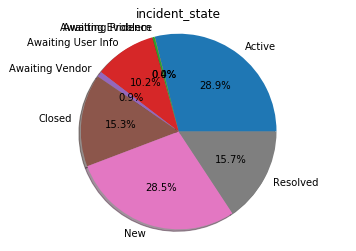

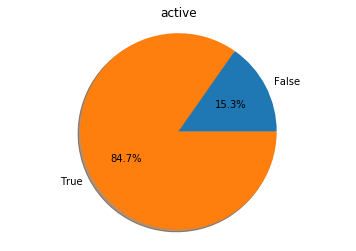

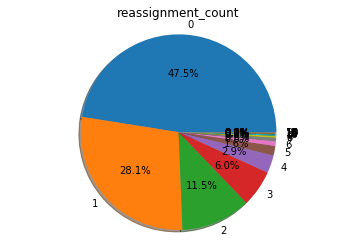

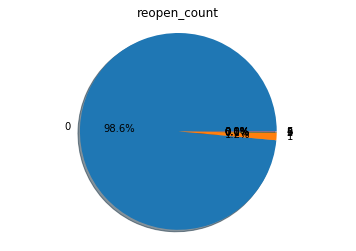

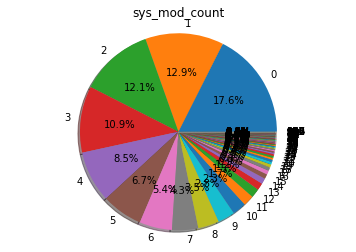

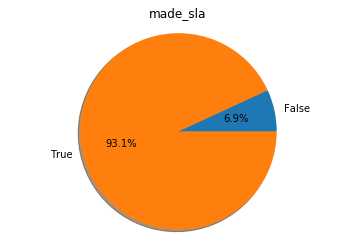

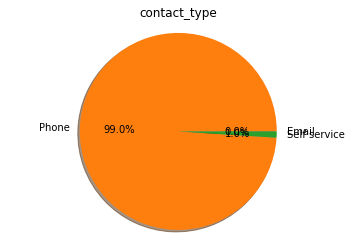

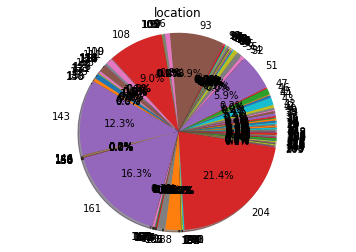

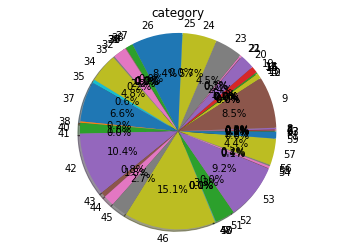

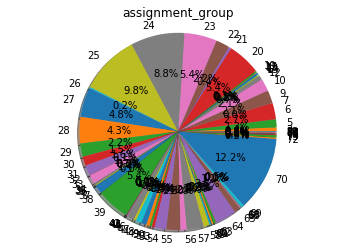

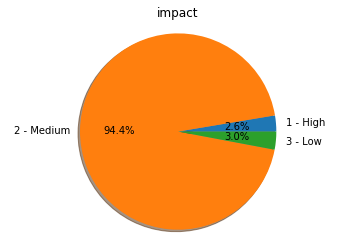

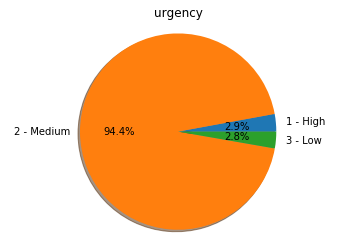

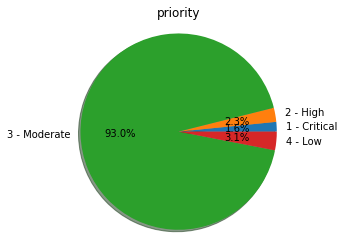

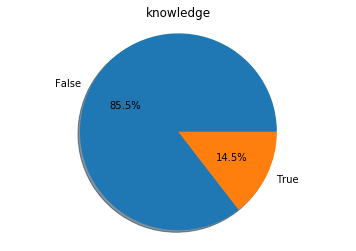

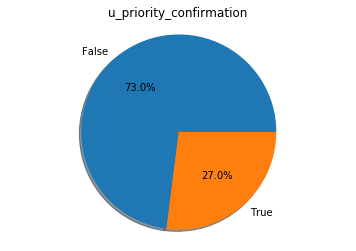

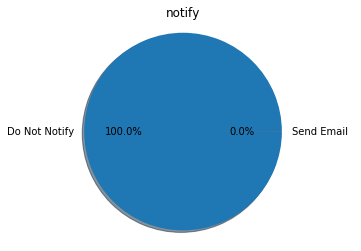

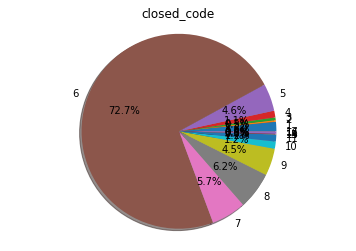

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
draw_polt=['incident_state','active','reassignment_count',
           'reopen_count','sys_mod_count','made_sla',
           'contact_type','location','category','assignment_group','impact','urgency','priority',
           'knowledge','u_priority_confirmation','notify','closed_code']
for str in draw_polt:
    labels = dataset[str].astype('category').cat.categories.tolist()
    counts = dataset[str].value_counts()
    sizes = [counts[var_cat] for var_cat in labels]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
    ax1.axis('equal')
    plt.title(str)
    plt.show()

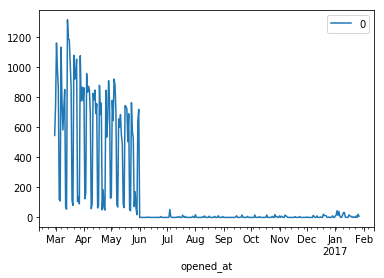

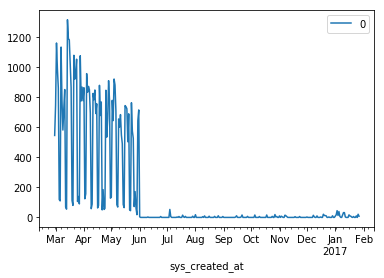

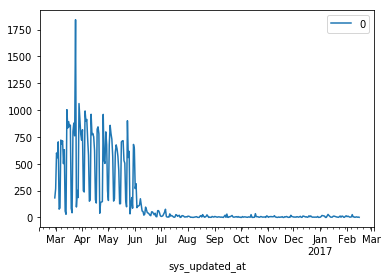

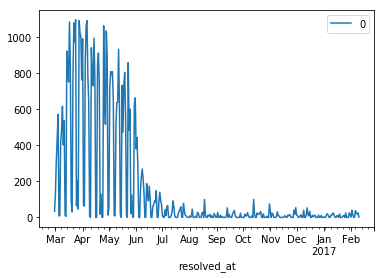

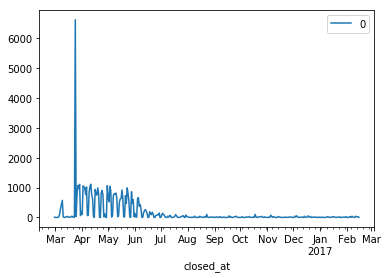

In [138]:
for str in date_list:
    s=dataset[str]
    s2=pd.Series(s.index.values, index=s ).resample('D').count()
    s3=s2.to_frame()
    s3.plot()
    plt.show()